In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter to Data Analyst Role
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [2]:
# Getting DataFrame with only Data Analyst Jobs from the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN Values from salary_year_avg column for Plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

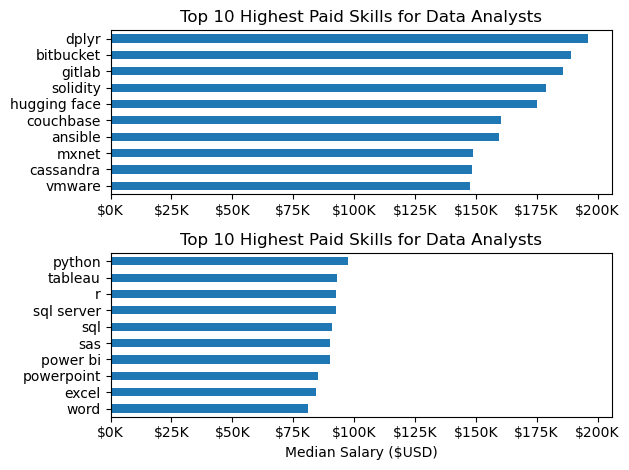

In [ ]:
# Exploding Skills Column to Prepare for getting Median Salary by Skill
df_DA_US = df_DA_US.explode('job_skills')

# Creating a grouped dataframe that is grouped by Job_Skills and then aggregates based on count and median
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Creating 2 new dataframes that give us the top 10 skills based on median salary and top 10 skills based on count
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

# all of this code right here is from the previous lesson making the box plots. Now we are just going to make it look nice

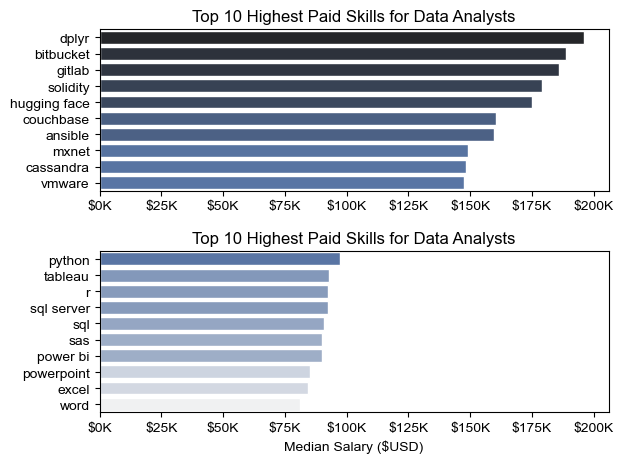

In [10]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) <-- this is old code we are going to make it better with Seaborn. The stuff below can stay
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


#Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)

# df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False) <-- this is old code we are going to make it better with Seaborn. The stuff below can stay
ax[1].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

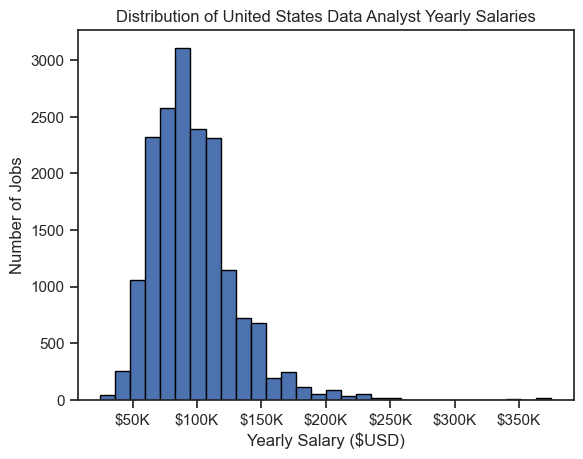

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

# Original Histogram

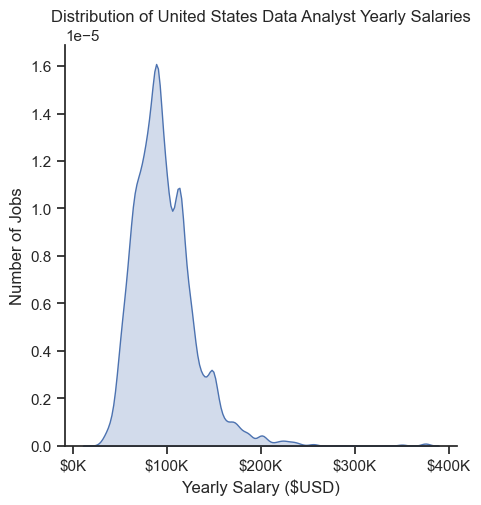

In [21]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True )

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

# Seaborn Displot

C:\Users\shawn\AppData\Local\Temp\ipykernel_5720\2168657736.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


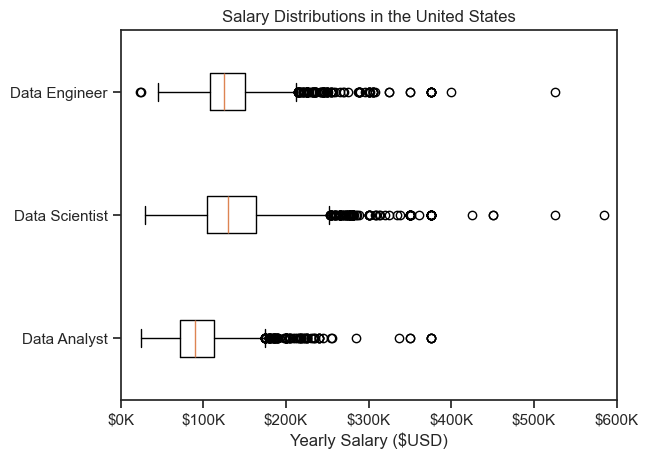

In [ ]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter For Job Titles and country & drop NaN values for salary
df_US_Boxplot = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# List of salaries for each Job Title
job_list = [df_US_Boxplot[df_US_Boxplot['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Old code to make boxplot

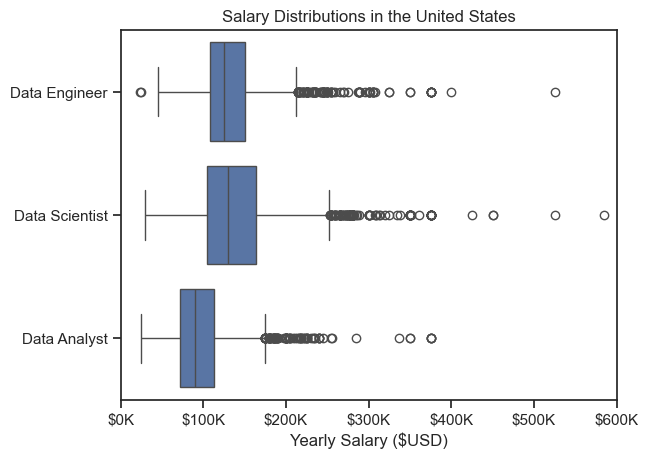

In [26]:
sns.boxplot(data=df_US_Boxplot, x='salary_year_avg', y="job_title_short")

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Seaborn Boxplot